<a href="https://colab.research.google.com/github/BillyBSig/DTS-Final-Assignment/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning, Deep Learning and BERT comparison for Fake News

**Latar Belakang Masalah**

Berita palsu telah menunjukkan pengaruhnya di berbagai bidang selama beberapa tahun terakhir. Beberapa di antaranya adalah fake news berpengaruh terhadap kemenangan yang diraih Donald Trump atas Hillary Clinton dalam pemilihan umum presiden Amerika Serikat pada tahun 2016 (Allcott dan Gentzkow, 2017). Star News membuat berita palsu mengenai percakapan yang direkam antara aktor Salman Khan dan aktris Aishwarya Rai yang terbukti sukses menarik perhatian publik ke Star TV (Thussu, 2007). Juga ada sebuah artikel lama mengenai kebangkrutan perusahaan induk United Airlines yang muncul kembali di internet dengan tanpa adanya waktu penerbitan dan secara keliru dipercayai sebagai berita baru tentang pengajuan kebangkrutan oleh perusahaan tersebut, sehingga mengakibatkan harga saham United Airlines dengan cepat jatuh sebesar 76 persen sebelum Nasdaq menghentikan trading (Carvalho et al, 2011).

**Mengapa Berita fake news perlu diselesaikan**

Banyak beredarnya berita palsu yang seakan mampu mempengaruhi pembaca sehingga mengarahkan pada ketidakbenaran sebuah informasi. Hal ini merupakan alasan yang mengawali tim kami dalam berinisiatif untuk mencari metode berupa solusi sesuai dengan permasalahan ini melalui Machine Learning

**Fake News Detection**

note:
- fake = 1

- not fake (real) = 0

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PATH = r"/content/drive/MyDrive/Fakenews/"

### Data Preparation

####**Data Loading**

In [6]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default is 'warn'

**dataset Real News (not fake)**

In [7]:
# load dataset: Real news data
df_true = pd.read_csv(PATH + 'True.csv')

# data preview
display(df_true.head(3))
df_true.shape

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


(21417, 4)

In [8]:
# add label
df_true['label'] = 0
df_true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0


In [9]:
# start dan end date
df_true.date.sort_values()

10099        April 1, 2016 
10019        April 1, 2016 
10020        April 1, 2016 
10092        April 1, 2016 
10094        April 1, 2016 
                ...        
20543    September 9, 2017 
20542    September 9, 2017 
20540    September 9, 2017 
20555    September 9, 2017 
20549    September 9, 2017 
Name: date, Length: 21417, dtype: object

In [10]:
# list of subjects/tema berita
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

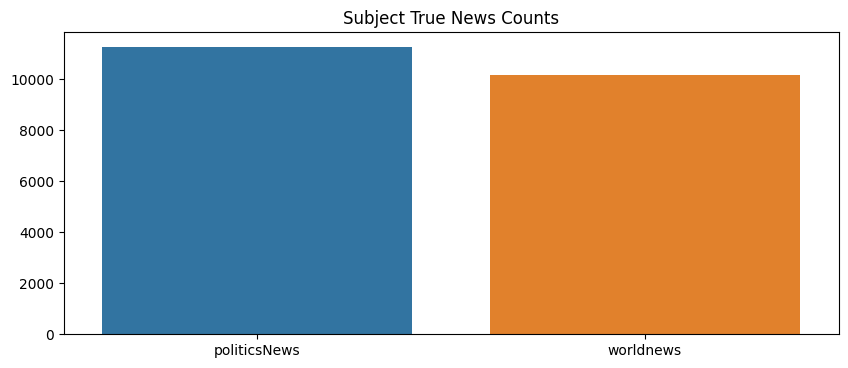

In [16]:
#true dataset subject value counts
true_subject_counts = df_true.subject.value_counts()
#true subject count visualization
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x = true_subject_counts.index, y=true_subject_counts.values)
plt.title('Subject True News Counts');

**Analisis** : Informasi Real news (berita benar) terdiri dari dua topik berita yaitu politic news (berita politik) dan world news (berita dunia). Proporsi kedua topik ini tidak jau berbeda dengan politics news 11.272 berita dan world news 10.145 berita.

**dataset Fake News**

In [11]:
# load dataset: Fake news data
df_fake = pd.read_csv(PATH + 'Fake.csv')

# data preview
display(df_fake.head(3))
df_fake.shape

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


(23481, 4)

In [12]:
# add label
df_fake['label'] = 1
df_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


In [13]:
# start dan end date
df_fake.date

0        December 31, 2017
1        December 31, 2017
2        December 30, 2017
3        December 29, 2017
4        December 25, 2017
               ...        
23476     January 16, 2016
23477     January 16, 2016
23478     January 15, 2016
23479     January 14, 2016
23480     January 12, 2016
Name: date, Length: 23481, dtype: object

In [14]:
# list of subjects/tema berita
df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

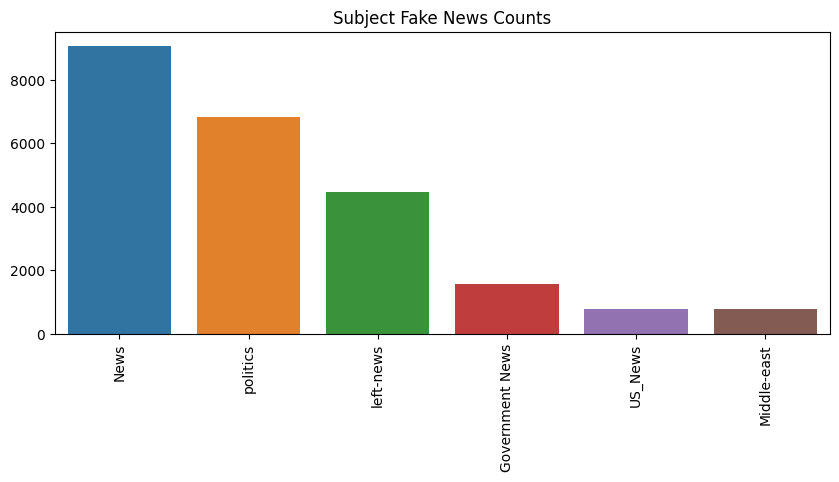

In [101]:
#fake subject value counts
fake_subject_counts = df_fake.subject.value_counts()
#fake subject count visualization
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x = fake_subject_counts.index, y=fake_subject_counts.values)
plt.title('Subject Fake News Counts')
plt.xticks(rotation=90);

**Analisis** : Berbeda dengan Real news, Fake news (berita palsu) terbagi dalam 6 topik berita yaitu News, Politics, Left-News, Goverment News, US_news, dan Middle Ees. Topik News menjadi topik dengan berita palsu paling tinggi dengan 9.050 berita dan diikuti Politics dengan 6.841 berita.

**penggabungan kedua dataset**

In [21]:
# concate data
df = pd.concat([df_true[['title', 'text', 'label']], df_fake[['title', 'text','label']]], axis=0).reset_index(drop=True)

# data preview
df

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1


In [22]:
# cek proporsi label
df['label'].value_counts(normalize=True)

1    0.522985
0    0.477015
Name: label, dtype: float64

proporsi data dari kedua kategori cukup seimbang (sebelum proses preprocessing)

####**Data Preprocessing**

In [23]:
import string
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### **Feature Engineering**

In [24]:
# cek missing value
df['text'].isna().sum()

0

In [25]:
# cek data "text" by sorting (ascending)
df['text'].sort_values().to_frame()

,text
33310,
33443,
33442,
33428,
33424,
...,...
40827,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...
42714,re buke r byo ok/ verb 1. express sharp disapp...
36178,ter ror ist ter r st/ noun a person who uses ...
38658,totally out of bounds! This is so wrong and so...


In [26]:
# cek data "text" by sorting (ascending) by tail
df['text'].sort_values().to_frame().tail(20)

,text
40985,https://youtu.be/0J4xPRYbsLU
33600,https://youtu.be/7oOhwHG2Gb4
33682,https://youtu.be/Ai5ayloRa-0
33702,https://youtu.be/E2KFe_htBSA And I think the f...
40965,https://youtu.be/E2KFe_htBSA And I think the f...
40941,https://youtu.be/RTuxvWjH3a4
33669,https://youtu.be/RTuxvWjH3a4
33266,https://youtu.be/ZfRYj2ZX3dE#Trump supporter g...
40694,https://youtu.be/ZfRYj2ZX3dE#Trump supporter g...
33819,https://youtu.be/kKFQ5i9jXmA


terdapat empty data pada column "text" 

karena pada column "title" mencakup judul dari "text" yg menggambarkan secara general mengenai isi text; maka fill empty data dengan value pada column "title"

In [27]:
# fill empty text with value from "title"
for idx in list(df.index):
  if df.loc[idx, 'text'] in [" ", "  "]:
    df.loc[idx, 'text'] = df.loc[idx, 'title']

# re-cek data text by sorting 
df['text'].sort_values().to_frame()

,text
35094,(Welcome) to America We hope you enjoy our...
37964,(Welcome) to America We hope you enjoy our...
39922,Delta Air Lines and Bank of America became ...
32062,Delta Air Lines and Bank of America became ...
33502,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...
...,...
33531,“So Rude!” Nancy Pelosi’s Daughter Blasted By ...
40879,“THE LEFT IS WILLING To Risk Civil War In Amer...
33578,“THE LEFT IS WILLING To Risk Civil War In Amer...
33360,“YOU ARE FAKE NEWS!” TRUMP DESTROYS CNN Right ...


In [28]:
# cek data duplikat
print(f"jumlah data duplikat: {df.duplicated().sum()}")
df[df.duplicated(keep=False)]['text'].sort_values().to_frame()

jumlah data duplikat: 5793


,text
35094,(Welcome) to America We hope you enjoy our...
37964,(Welcome) to America We hope you enjoy our...
32062,Delta Air Lines and Bank of America became ...
39922,Delta Air Lines and Bank of America became ...
37706,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...
...,...
40734,“BIKERS FOR TRUMP” Vow To Defend Trump During ...
33353,“LITTLE” MARCO RUBIO GRILLS Trump’s Secretary ...
37685,“LITTLE” MARCO RUBIO GRILLS Trump’s Secretary ...
40879,“THE LEFT IS WILLING To Risk Civil War In Amer...


In [29]:
# remove duplicates data
df.drop_duplicates(inplace=True)

# re-cek data duplikat
print(f"jumlah data duplikat: {df.duplicated().sum()}")

jumlah data duplikat: 0


##### **Data Cleansing**

In [30]:
# reset index karena terdapat data yg dihapus
df.reset_index(drop=True, inplace=True)

preprocessing text:
- lowercasing
- remove numbers
- remove punctuations
- remove non-ASCII characters
- remove words with 2 or fewer letters
- remove website url
- remove twitter url
- remove excessive whitespaces & pre or post whitespace in the texts
- remove stopwords
- lemmatization or stemming (not performed)


In [31]:
def text_preprocessing(text):
  t = text.lower()  # lowercasing
  t = re.sub(r'https?:\/\/.*\/\w*', '', t)  # remove website url
  t = re.sub('(pic.twitter)\w*', '', t)  # remove twitter url
  t = re.sub(f"[{string.punctuation.replace('#','')}]+", ' ', t)  # remove punctuations
  t = re.sub('[0-9]', '', t)  # remove numbers
  t = re.sub('[^\x00-\x7F]+', '', t)  # remove non-ASCII characters
  t = re.sub(r'\b\w{1,2}\b', '', t)  # words with 2 or fewer letters
  t = re.sub(r'\s{2,}', ' ', t)  # remove excessive whitespaces
  t = t.strip()  # remove pre or post whitespace
  t = ' '.join([word for word in t.split() if word not in stopwords.words('english')])  # remove stopwords
  return t

In [32]:
CLEANED_DATA_PATH = PATH + 'data_cleaned.csv'

# pengecekan: jika dataset yg sudah di-cleansing belum ada
# maka akan melakukan preprocessing
if not os.path.exists(CLEANED_DATA_PATH):
  # perform preprocessing
  df['text_cleaned'] = df['text'].apply(text_preprocessing)
  # save cleaned data
  df.to_csv(CLEANED_DATA_PATH, index=False)
  df_cleaned = pd.read_csv(CLEANED_DATA_PATH)
  print(f'cleaned data saved into {CLEANED_DATA_PATH}')

else:
  df_cleaned = pd.read_csv(CLEANED_DATA_PATH)
  print('cleaned data loaded!')

cleaned data loaded!


In [33]:
# data preview
df_cleaned

,title,text,label,text_cleaned
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,seattle washington reuters president donald tr...
...,...,...,...,...
39100,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,1,century wire says world stage men women merely...
39101,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,1,randy johnson century wirethe majority mainstr...
39102,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,1,tune alternate current radio network acr anoth...
39103,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,1,century wire says new front opened long battle...


In [34]:
# cek empty value atau missing value pada column "text_cleaned"
df_cleaned.loc[(df_cleaned['text_cleaned'].isna()) | (df_cleaned['text_cleaned'] == "")]

,title,text,label,text_cleaned
30555,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,1,NaN
33378,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,1,NaN
33447,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,1,NaN
33460,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1,NaN
33510,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,1,NaN
33523,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,1,NaN
33597,TRUMP SUPPORTER Whose Brutal Beating By Black ...,https://youtu.be/kKFQ5i9jXmA,1,NaN
36643,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,1,NaN
36701,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,1,NaN
36702,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,1,NaN


In [35]:
# ambil data yg memiliki empty value atau missing value pada "text_cleaned"
df_empty_text = df_cleaned.loc[(df_cleaned['text_cleaned'].isna()) | (df_cleaned['text_cleaned'] == "")]
df_empty_text

,title,text,label,text_cleaned
30555,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,1,NaN
33378,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,1,NaN
33447,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,1,NaN
33460,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1,NaN
33510,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,1,NaN
33523,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,1,NaN
33597,TRUMP SUPPORTER Whose Brutal Beating By Black ...,https://youtu.be/kKFQ5i9jXmA,1,NaN
36643,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,1,NaN
36701,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,1,NaN
36702,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,1,NaN


In [36]:
# dapatkan list index dari data tambahan
idx_df_empty_text = list(df_empty_text.index)
idx_df_empty_text

[30555, 33378, 33447, 33460, 33510, 33523, 33597, 36643, 36701, 36702]

In [37]:
# fill empty value atau missing value pada column "text_cleaned" dengan value pada column "title"
# dengan syarat value pada column "title" bukanlah url
for idx, title in zip(list(df_empty_text.index), df_empty_text.loc[:, 'title']):
  if not re.search(r'https?:\/\/.*\/\w*', title):
    # isi dengan value dari column "title"
    df_empty_text.loc[idx, 'text_cleaned'] = df_empty_text.loc[idx, 'title']
  else:
    # jika value pada column "title" berupa url, maka drop row tersebut
    df_empty_text.drop(index=[idx], axis=0, inplace=True)

In [38]:
# data preview
df_empty_text

,title,text,label,text_cleaned
33378,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,1,TUCKER CARLSON DESTROYS Smug Elector Who Refus...
33447,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,1,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...
33460,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1,BREAKING: MITT ROMNEY Speaks To Reporters Foll...
33510,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,1,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...
33523,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,1,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...
33597,TRUMP SUPPORTER Whose Brutal Beating By Black ...,https://youtu.be/kKFQ5i9jXmA,1,TRUMP SUPPORTER Whose Brutal Beating By Black ...
36643,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,1,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...


In [39]:
# apply text preprocessing pada column "text" pada dataframe "df_empty_text"
df_empty_text['text_cleaned'] = df_empty_text['text_cleaned'].apply(text_preprocessing)
df_empty_text

,title,text,label,text_cleaned
33378,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,1,tucker carlson destroys smug elector refuses v...
33447,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,1,views whoopi goldberg host black people dont w...
33460,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1,breaking mitt romney speaks reporters followin...
33510,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,1,wow leftist bully rosie odonnell pushes horrib...
33523,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,1,comedian tim allen hollywood hypocrites didnt ...
33597,TRUMP SUPPORTER Whose Brutal Beating By Black ...,https://youtu.be/kKFQ5i9jXmA,1,trump supporter whose brutal beating black mob...
36643,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,1,video bravo host scorches obama response chatt...


In [40]:
# drop data tambahan pada dataframe utama
# dilakukan karena nilai pada index tersebut akan digantikan dengan data tambahan yg sudah di-cleansing
df_cleaned.drop(index=idx_df_empty_text, axis=0, inplace=True)

In [41]:
# gabungkan data pada dataframe utama dengan data tambahan
df_cleaned = pd.concat([df_empty_text, df_cleaned], axis=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,title,text,label,text_cleaned
0,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,https://youtu.be/7oOhwHG2Gb4,1,tucker carlson destroys smug elector refuses v...
1,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,https://youtu.be/RTuxvWjH3a4,1,views whoopi goldberg host black people dont w...
2,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1,breaking mitt romney speaks reporters followin...
3,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,1,wow leftist bully rosie odonnell pushes horrib...
4,COMEDIAN TIM ALLEN On Hollywood Hypocrites: Th...,https://youtu.be/0J4xPRYbsLU,1,comedian tim allen hollywood hypocrites didnt ...
...,...,...,...,...
39097,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,1,century wire says world stage men women merely...
39098,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,1,randy johnson century wirethe majority mainstr...
39099,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,1,tune alternate current radio network acr anoth...
39100,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,1,century wire says new front opened long battle...


##### **Visualize WordCloud**

In [42]:
#words_excluded = ['donald', 'trump', 'barack', 'obama']

In [43]:
def viz_word_cloud(texts, news_label):
  global wc
  wc = WordCloud(
      background_color='white', 
      max_words=50,
      #stopwords=words_excluded,
      collocations=True
  ).generate(texts)

  plt.figure(figsize=(10,10))
  plt.title(
      f'WordCloud: {news_label} News', 
      fontsize=15, fontweight='bold', 
      pad=20
  )

  plt.axis('off')
  plt.imshow(wc)
  plt.show()

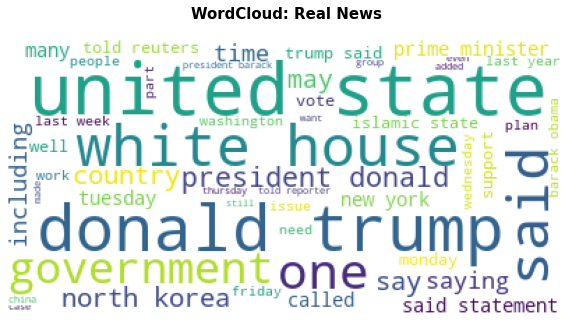

In [44]:
# visualize word cloud: Real News
texts_real = df_cleaned.loc[df_cleaned['label'] == 0, 'text_cleaned'].str.cat()
viz_word_cloud(texts=texts_real, news_label='Real')

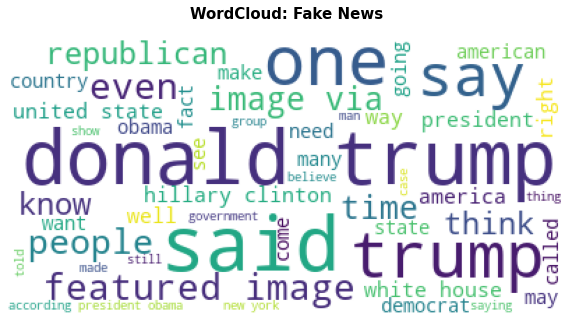

In [45]:
# visualize word cloud: Fake News
texts_fake = df_cleaned.loc[df_cleaned['label'] == 1, 'text_cleaned'].str.cat()
viz_word_cloud(texts=texts_fake, news_label='Fake')

**Analisis**: Donald Trump menjadi tokoh yang paling banyak tampil seluruh berita baik pada fake news maupun true news. Keseluruhan berita lebih berfokus pada isu politik Amerika serika.  Selain Donald Trump, Hillary Clinton juga menjadi tokoh yang paling sering muncul pada fake news. 

##### **Visualize Trigram**

In [103]:
fake_text = df_cleaned['text_cleaned'][df_cleaned['label'] == 1].sample(n=4000,  random_state=0)
fake_text[:3]

24825    state michigan since gop takeover petri dish l...
23017    new york daily news known subtlety comes cover...
25922    gop candidate donald trump democratic candidat...
Name: text_cleaned, dtype: object

In [105]:
true_text = df_cleaned['text_cleaned'][df_cleaned['label'] == 0].sample(n=4000,  random_state=0)
true_text[:3]

18950    phnom penh reuters cambodia main opposition pa...
3499     brussels reuters european unions executive for...
17806    madrid reuters leader spain socialists main op...
Name: text_cleaned, dtype: object

In [106]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
#trigrams visualization
def trigram_viz(text, title):
  join = ' '.join(text) #join all line text
  token_text = word_tokenize(join) #tokenize the join text
  from nltk import FreqDist, trigrams #import frequency distribution and trigrams
  trigrams = trigrams(token_text) #trigrams the token text
  freq_trigrams = FreqDist()
  for trigram in trigrams:
    freq_trigrams[trigram] +=1 
  
  tg_dict_sorted = sorted(freq_trigrams.items(), key=lambda kv: kv[1], reverse=True)
  tg, counts = list(zip(*tg_dict_sorted))
  tg_str = list(map(lambda x: '-'.join(x), tg))
  df_tg = pd.DataFrame([tg_str, counts]).T
  df_tg.columns = ['Trigrams', 'Counts']

  ## Setting figure, ax into variables
  fig, ax = plt.subplots(figsize=(10,5), dpi=100)

  ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  all_plot = sns.barplot(x='Counts', y='Trigrams', data=df_tg.head(20), ax=ax, palette='Set2')
  plt.title(title);

[(('featured', 'image', 'via'), 1234), (('donald', 'trump', 'realdonaldtrump'), 396), (('new', 'york', 'times'), 254), (('black', 'lives', 'matter'), 209), (('president', 'united', 'states'), 186), (('president', 'donald', 'trump'), 164), (('image', 'via', 'video'), 159), (('president', 'barack', 'obama'), 155), (('video', 'screen', 'capture'), 148), (('via', 'video', 'screen'), 140), (('news', 'century', 'wire'), 112), (('via', 'getty', 'images'), 111), (('new', 'york', 'city'), 108), (('image', 'via', 'screen'), 103), (('via', 'screen', 'capture'), 102), (('affordable', 'care', 'act'), 100), (('video', 'via', 'youtube'), 92), (('director', 'james', 'comey'), 87), (('fbi', 'director', 'james'), 85), (('featured', 'image', 'screenshot'), 75)]


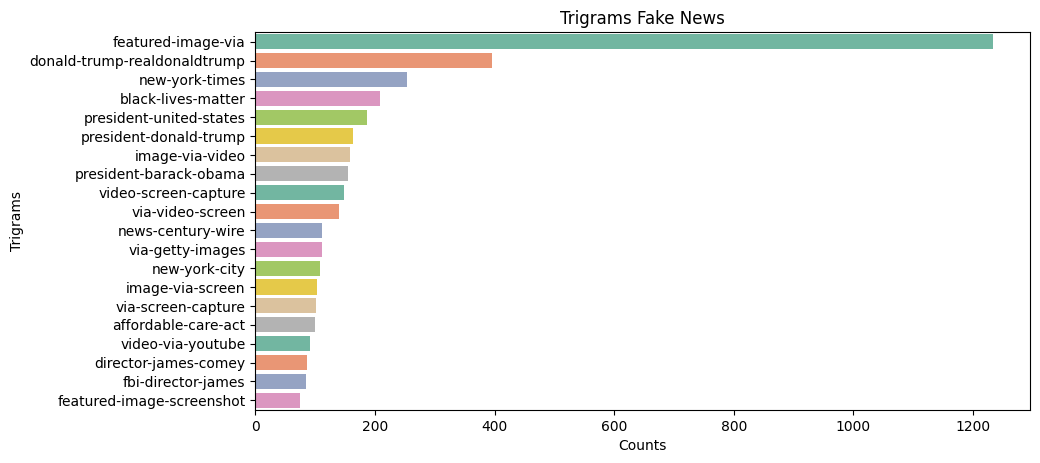

In [111]:
trigram_viz(fake_text, 'Trigrams Fake News')

**Analisis**: Penyebaran fake news lebih banyak menggunakan media informasi berupa video dan potongan gambar yang dibagikan melalui media sosial. Selain tokoh politik, tokoh publik lain yang banyak tampil pada fake news adalah James Comey, seorang mantan direktur biro investigasi federal Amerika Serikat. Selain politik, isu sensitif seperti *black lives matter* juga menjadi topik yang sering muncul pada fake news.

[(('president', 'donald', 'trump'), 805), (('president', 'barack', 'obama'), 402), (('washington', 'reuters', 'president'), 281), (('reuters', 'president', 'donald'), 280), (('president', 'donald', 'trumps'), 280), (('president', 'elect', 'donald'), 178), (('white', 'house', 'said'), 176), (('president', 'barack', 'obamas'), 170), (('new', 'york', 'reuters'), 161), (('president', 'vladimir', 'putin'), 140), (('elect', 'donald', 'trump'), 139), (('secretary', 'state', 'rex'), 139), (('former', 'president', 'barack'), 138), (('state', 'rex', 'tillerson'), 137), (('said', 'washington', 'reuters'), 128), (('speaker', 'paul', 'ryan'), 126), (('chancellor', 'angela', 'merkel'), 113), (('leader', 'mitch', 'mcconnell'), 113), (('russian', 'president', 'vladimir'), 110), (('respond', 'request', 'comment'), 102)]


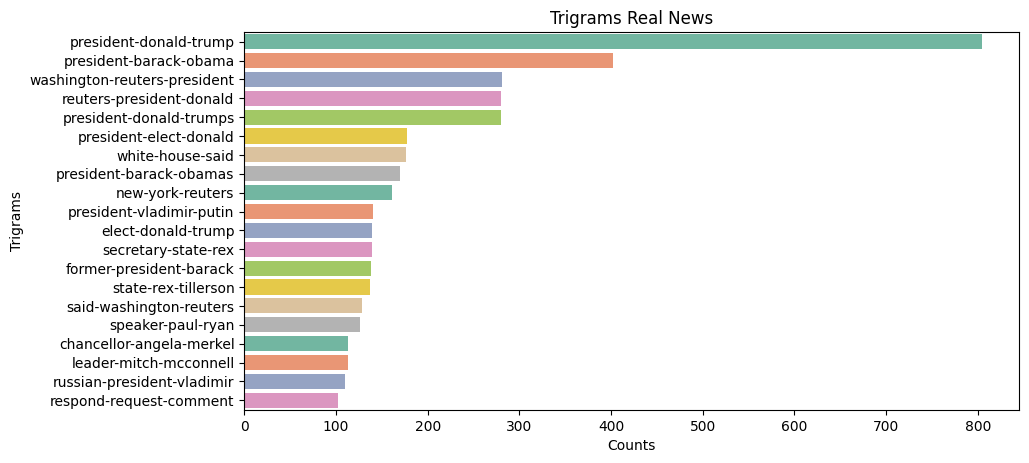

In [112]:
trigram_viz(true_text, 'Trigrams Real News')

**Analisis**: Berbeda dengan fake news, real news lebih bersumber pada media informasi yang lebih kredibel dari Reuters. Reuters  adalah sebuah organisasi berita internasional dan menjadi salah satu kantor berita terbesar di dunia. Real news juga berfokus pada pemberitaan mengenai pemerintahan dan tokoh politik Amerika Serikat seperti Donald Trump, Barrak Obama, Paul Ryan dan Mitch McConnell. Tokoh politik dunia seperti Vladimir Putin dan Angela Merke juga menjadi topik yang sering dibahas pada real news.

### Data Modelling

In [ ]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

##### **Data Processing and Splitting**

In [ ]:
# tokenisasi
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(df_cleaned['text_cleaned'])

In [ ]:
# konversi teks ke sequence token
text_seq = tokenizer.texts_to_sequences(df_cleaned['text_cleaned'])

# data preview by sample
text_seq[0]

[4714, 3845, 11258, 13695, 13696, 3872, 70, 3, 129]

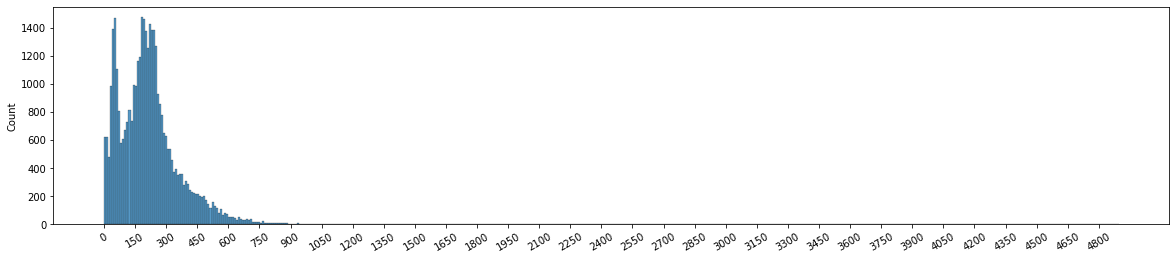

In [ ]:
# visualisasi jumlah kata pada tiap text
len_text = [len(text.split()) for text in df_cleaned.loc[:, 'text_cleaned']]

plt.figure(figsize=(20,4))
sns.histplot(len_text)
plt.xticks(
    ticks=list(range(0, max(len_text), 150)), 
    labels=list(range(0, max(len_text), 150)),
    rotation=30
);

In [ ]:
MAX_LENGTH = 200
PADDING = 'post'
TRUNCATING = 'post'

In [ ]:
# penyeragaman panjang text
text_seq_preprocessed = tf.keras.preprocessing.sequence.pad_sequences(
    sequences=text_seq, maxlen=MAX_LENGTH, 
    padding=PADDING, truncating=TRUNCATING
)

# data preview by sample
text_seq_preprocessed[1]

array([ 1085, 10444,  7474,   682,   154,     6,   838, 10296,   510,
          23,     6,   129,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
# menyimpan data "label" ke variable labels
labels = df_cleaned['label']

# data preview by sample
labels[0]

1

In [ ]:
# split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(text_seq_preprocessed, labels, test_size=0.15, stratify=labels, random_state=42)

# data preview
print(f'jumlah data training : {X_train.shape[0]} samples')
print(f'jumlah data testing  : {X_test.shape[0]} samples\n\n#note: 15% dari data training akan digunakan sebagai data validasi')

jumlah data training : 33236 samples
jumlah data testing  : 5866 samples

#note: 15% dari data training akan digunakan sebagai data validasi


In [ ]:
# define parameters utk load GloVe word embeddings
path_to_glove_file = r"/content/drive/MyDrive/training/DTS-ML TensorFlow/assignments/assigment 6/glove.6B.200d.txt" 
num_tokens = len(tokenizer.word_index)+1  # alias vocabSize
embedding_dim = 200
hits = 0
misses = 0
embeddings_index = {}

# read word vectors
with open(path_to_glove_file) as f:
  for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# ====================================
# create variabel utk menampung vector
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
  # get vector berdasarkan word-nya
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # jika word dari dataset terdapat di dalam GloVe, 
    # maka base vector (all-zeros) pada variable "embedding_vector"
    # akan diubah sesuai dengan vector dari GloVe
    embedding_matrix[i] = embedding_vector
    hits += 1
  else:
    misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 74174 words (34517 misses)


##### **Model Training**

In [ ]:
# dictionary of labels
label_dict = {
    0: 'real news',
    1: 'fake news'
}

In [ ]:
# define parameters
BATCH_SIZE = 64
NUM_EPOCHS = 2

In [ ]:
# build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(
    input_dim=num_tokens, 
    output_dim=embedding_dim, 
    input_shape=(X_train.shape[1],), 
    weights=[embedding_matrix],
    trainable=False 
))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh')))
model.add(tf.keras.layers.Dense(units=len(label_dict), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          21738400  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 22,075,810
Trainable params: 337,410
Non-trainable params: 21,738,400
_________________________________________________________________


In [ ]:
# compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# start training
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Epoch 1/2
442/442 [==============================] - 404s 904ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0098 - val_accuracy: 0.9984
Epoch 2/2
442/442 [==============================] - 399s 904ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0123 - val_accuracy: 0.9978


In [ ]:
# save model
model.save(PATH+'model_fake_news_v1.h5')

##### **Model Evaluation**

In [ ]:
# predict data testing
prediction = model.predict(X_test).argmax(axis=-1)

# show performance report
print(classification_report(y_test, prediction, target_names=list(label_dict.values()), digits=4))

              precision    recall  f1-score   support

   real news     0.9987    0.9991    0.9989      3180
   fake news     0.9989    0.9985    0.9987      2686

    accuracy                         0.9988      5866
   macro avg     0.9988    0.9988    0.9988      5866
weighted avg     0.9988    0.9988    0.9988      5866



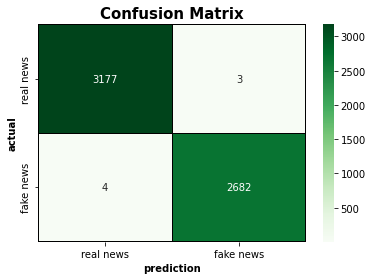

In [ ]:
# show confusion matrix
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6,4))
plt.title('Confusion Matrix', fontweight='bold', fontsize=15)
sns.heatmap(
    data=cm, annot=True, cmap='Greens', fmt='d',
    linecolor='black', linewidths=0.1,
    xticklabels=list(label_dict.values()), 
    yticklabels=list(label_dict.values())
)

plt.xlabel('prediction', fontweight='bold')
plt.ylabel('actual', fontweight='bold')

plt.show()

##### **Model Testing**

**Testing on your own text**

In [ ]:
def test_data_preprocessing(text):
  t = text_preprocessing(text)
  t = tokenizer.texts_to_sequences([t])
  t = tf.keras.preprocessing.sequence.pad_sequences(t, maxlen=MAX_LENGTH, padding=PADDING, truncating=TRUNCATING)
  return t

In [ ]:
# write your text here
test_data = "you should hide whenever the president asked you for your money"

# preprocess test data
seq_test = test_data_preprocessing(test_data)
seq_test

array([[3468, 4514,    5,  116,  171,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
# show manual test data prediction
test_prediction = model.predict(seq_test)

print(f"text:\n{test_data}\n")
print(f"prediction: {label_dict[test_prediction.argmax(axis=-1)[0]].upper()}")

# show probabilies
print('==================\nprobability:')
for i, lbl in enumerate(label_dict.values()):
  print(f"[{lbl.upper()}] {model.predict(seq_test)[0][i]:.4f}")

text:
you should hide whenever the president asked you for your money

prediction: FAKE NEWS
probability:
[REAL NEWS] 0.0012
[FAKE NEWS] 0.9988


**Testing on random data sample**

In [ ]:
ROW = 100
df_cleaned.loc[ROW, ['text_cleaned','label']].to_frame('sample text')

,sample text
text_cleaned,washington reuters district court judge ruled ...
label,0


In [ ]:
t = df_cleaned.loc[ROW, 'text_cleaned']
t = tokenizer.texts_to_sequences([t])
t = tf.keras.preprocessing.sequence.pad_sequences(t, maxlen=MAX_LENGTH, padding=PADDING, truncating=TRUNCATING)
print(f"prediction: {label_dict[model.predict(t).argmax(axis=-1)[0]].upper()}")

prediction: REAL NEWS
